<a href="https://colab.research.google.com/github/techthumb1/Analytics-Projects/blob/main/Genomic_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬Genomic Data Analysis and Prediction: Towards Personalized Medicine

---
## Introduction

The speed in development of genomic technologies has opened doors to opportunities in understanding the genetic foundations of human health and disease.

Precision medicine, also known as personalized medicine, represents an approach aiming to customize medical treatment based on individual genetic profiles, environment, and lifestyle. By analyzing large genomic datasets, healthcare providers can predict disease susceptibility, tailor personalized treatment plans for patients, which ultimately will improve patient outcomes.


At this preliminary stage, it's essential to recognize what genomic data typically involves in medical settings:

- **SNPs (Single Nucleotide Polymorphisms):** Variations at single DNA base pairs, significant in predicting disease susceptibility, drug metabolism, and therapeutic responses.

- **Gene Expression Levels:** Indicators of how actively genes produce RNA and proteins, crucial for understanding diseases such as cancer or metabolic disorders.

- **Genotype/Phenotype Information:** Genotype data represents genetic makeup, while phenotypes represent observable traits or clinical outcomes. Together, these facilitate personalized medicine, disease prediction, and treatment optimization.



In [ ]:
!pip install altair --quiet
!pip install -U shap
!pip install causal-learn graphviz pydot --quiet

## Project Overview

Throughout this notebook we will:

- **Explore and visualize genomic datasets:**

  Investigate genomic variability, expression patterns, and their associations with health and disease.

- **Apply preprocessing and feature engineering techniques:**

  Prepare data through imputation, normalization, feature extraction, and biological enrichment analyses.

- **Build robust predictive models:**

  Utilize SOTA methods including deep neural networks (DNNs), transformer-based architectures, gradient boosting frameworks, and graph neural networks to classify diseases and predict health-related outcomes.

- **Employ advanced semantic and causal analyses:**
  
  Implement structural causal models, Bayesian networks, and counterfactual reasoning to derive semantic cause-and-effect insights.

- **Integrate explainable artificial intelligence (XAI):**

  Ensure models remain transparent, interpretable, and clinically meaningful by employing SHAP, and Integrated Gradients.

- **Demonstrate clear medical and biological interpretability:**

  Combine data science with clinical explanations to help users understand the relevance of the predictions.

- **Lay foundations for personalized medicine:**

  Obtain insights that will aid in delivering individualized treatment recommendations, disease prevention strategies, and health optimization plans.



In [ ]:
import pandas as pd
from google.colab import drive


from plotnine import ggplot, aes, geom_histogram, geom_density, theme_bw, labs
from plotnine.data import mpg
from IPython.display import display


In [ ]:
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/gene_expression.csv'

df = pd.read_csv(file_path)
print("File loaded successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully!


In [ ]:
# First 5 rows
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
# Dataset shape
print("Dataset Shape:", df.shape)
print("\nDataset Preview:")
print(df.head())

# Dataset summary
print("\nDataset Information:")
print(df.info())


Dataset Shape: (3000, 3)

Dataset Preview:
   Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB
None


In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          Gene One     Gene Two  Cancer Present
count  3000.000000  3000.000000     3000.000000
mean      5.600133     5.410467        0.500000
std       1.828388     1.729081        0.500083
min       1.000000     1.000000        0.000000
25%       4.300000     4.000000        0.000000
50%       5.600000     5.400000        0.500000
75%       6.900000     6.700000        1.000000
max      10.000000    10.000000        1.000000


In [ ]:
# Missing data check
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64


In [ ]:
# Class distribution
print("\nCancer Presence Distribution:")
print(df['Cancer Present'].value_counts(normalize=True))


Cancer Presence Distribution:
Cancer Present
1    0.5
0    0.5
Name: proportion, dtype: float64


In genomic datasets, distributions and variability often provide important clinical insights:

- **High variability** in gene expression levels could imply heterogeneous responses among patients, making personalized medicine necessary.

- **Class imbalance** may indicate challenges in predictive modeling, requiring specialized methods.

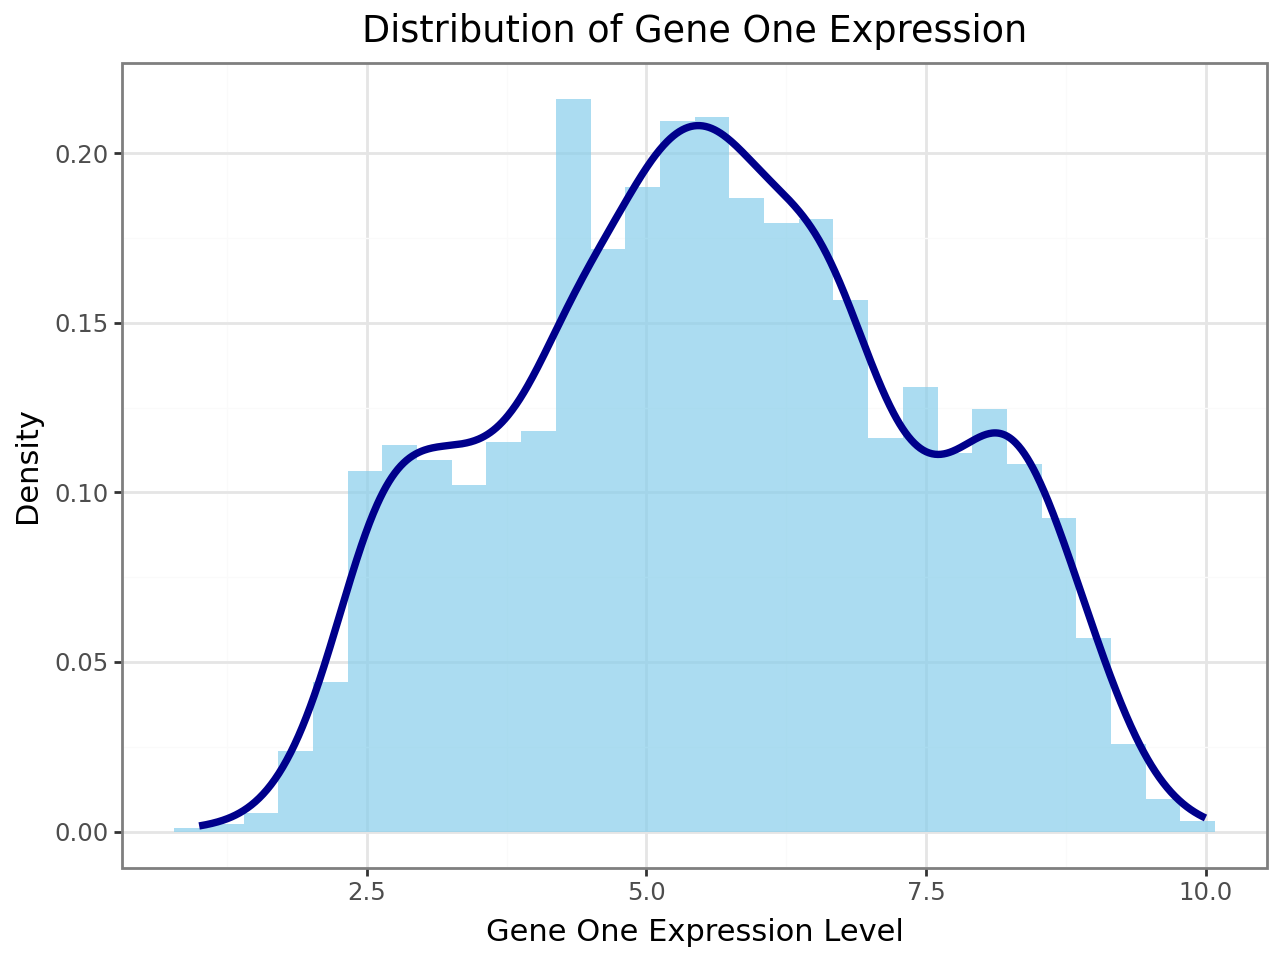

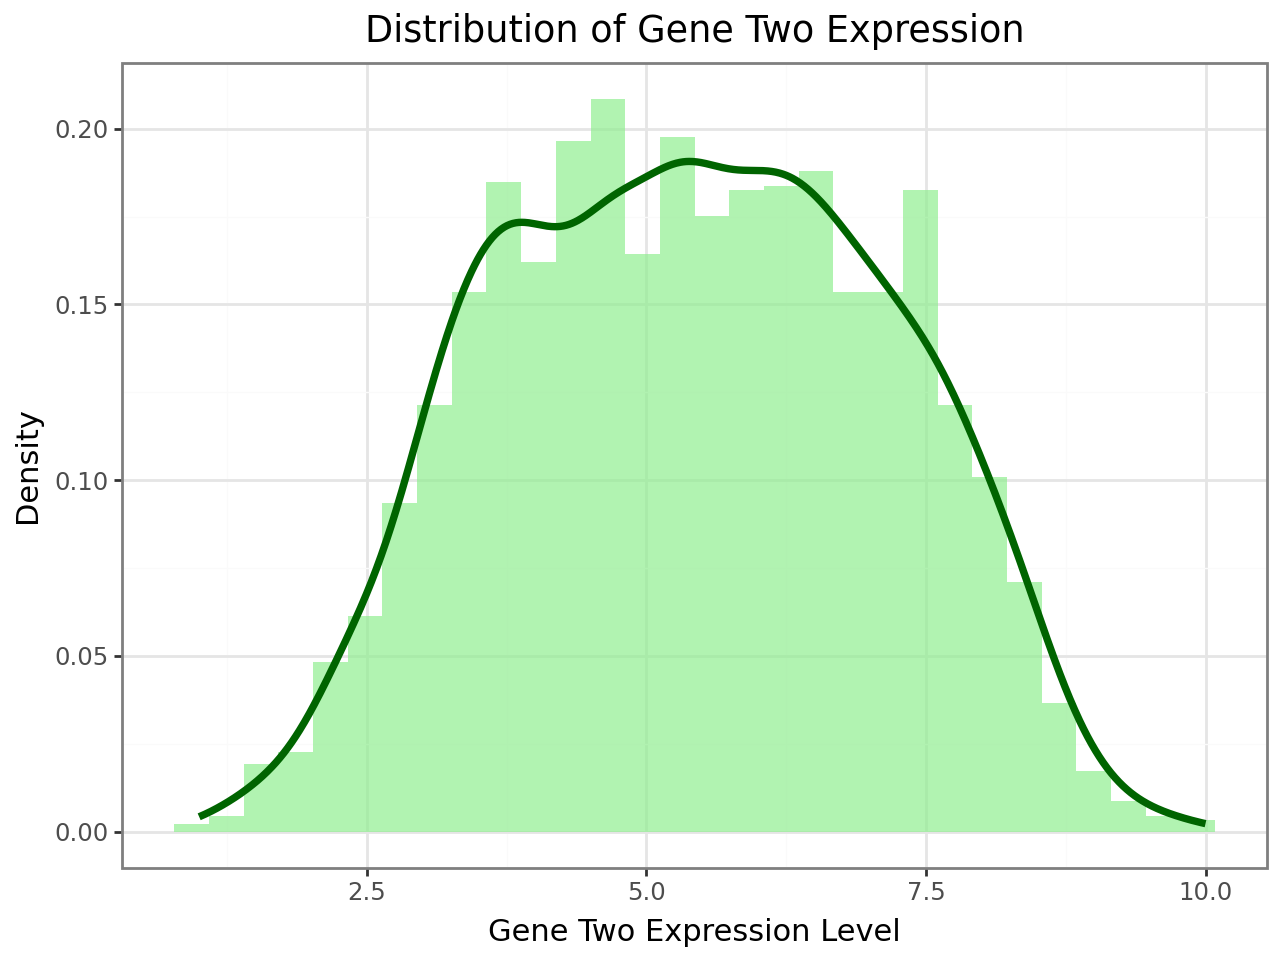

In [ ]:
# Import Plotnine
from plotnine import ggplot, aes, geom_histogram, geom_density, theme_bw, labs

# Histogram and density plot for Gene One
plot_gene_one = (
    ggplot(df, aes(x='Gene One')) +
    geom_histogram(aes(y='..density..'), fill='skyblue', bins=30, alpha=0.7) +
    geom_density(color='darkblue', size=1.5) +
    labs(title='Distribution of Gene One Expression', x='Gene One Expression Level', y='Density') +
    theme_bw()
)

# Histogram and density plot for Gene Two
plot_gene_two = (
    ggplot(df, aes(x='Gene Two')) +
    geom_histogram(aes(y='..density..'), fill='lightgreen', bins=30, alpha=0.7) +
    geom_density(color='darkgreen', size=1.5) +
    labs(title='Distribution of Gene Two Expression', x='Gene Two Expression Level', y='Density') +
    theme_bw()
)

# Display plots
display(plot_gene_one, plot_gene_two)


**Gene One** has a fairly consistent activation pattern across most individuals. This implies that it might be *constitutively expressed*.

**Gene Two** is expressed across a wider range, suggesting that it may vary significantly between healthy and disease states.


In [ ]:
import json
from IPython.display import HTML

# Convert the first 200 records to JSON for D3.js (for performance in browser)
plot_data = df.head(200).to_dict(orient='records')

# Embed JSON into JavaScript string
json_data = json.dumps(plot_data)


In [ ]:
HTML(f"""
<div id="scatterplot"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>
  const data = {json_data};

  const width = 600;
  const height = 400;
  const margin = {{top: 30, right: 30, bottom: 50, left: 50}};

  const svg = d3.select("#scatterplot")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", `translate(${{margin.left}}, ${{margin.top}})`);

  const x = d3.scaleLinear()
    .domain(d3.extent(data, d => d["Gene One"]))
    .range([0, width]);

  const y = d3.scaleLinear()
    .domain(d3.extent(data, d => d["Gene Two"]))
    .range([height, 0]);

  const color = d3.scaleOrdinal()
    .domain([0, 1])
    .range(["#1f77b4", "#d62728"]);

  svg.append("g")
    .attr("transform", `translate(0, ${{height}})`)
    .call(d3.axisBottom(x));

  svg.append("g")
    .call(d3.axisLeft(y));

  svg.selectAll("circle")
    .data(data)
    .enter()
    .append("circle")
      .attr("cx", d => x(d["Gene One"]))
      .attr("cy", d => y(d["Gene Two"]))
      .attr("r", 4)
      .style("fill", d => color(d["Cancer Present"]))
      .style("opacity", 0.7);

  svg.append("text")
    .attr("x", width / 2)
    .attr("y", height + 40)
    .attr("text-anchor", "middle")
    .text("Gene One");

  svg.append("text")
    .attr("x", -height / 2)
    .attr("y", -35)
    .attr("transform", "rotate(-90)")
    .attr("text-anchor", "middle")
    .text("Gene Two");
</script>
""")


This chart shows how the levels of Gene One and Gene Two relate to whether cancer is present. People with cancer (red dots) usually have higher Gene One and lower Gene Two levels, while those without cancer (blue dots) show the opposite.

In [ ]:
import altair as alt
import pandas as pd

# Sample or use full DataFrame
df_bar = pd.DataFrame([
    {"Cancer": 0, "Gene": "Gene One", "Expression": 4.60},
    {"Cancer": 1, "Gene": "Gene One", "Expression": 6.60},
    {"Cancer": 0, "Gene": "Gene Two", "Expression": 6.61},
    {"Cancer": 1, "Gene": "Gene Two", "Expression": 4.21}
])

# Bar chart using Altair
bar_chart = alt.Chart(df_bar).mark_bar().encode(
    x=alt.X('Gene:N', title='Gene'),
    y=alt.Y('Expression:Q', title='Mean Expression'),
    color=alt.Color('Cancer:N', scale=alt.Scale(range=['#1f77b4', '#d62728'])),
    column='Cancer:N',
    tooltip=['Gene', 'Expression', 'Cancer']
).properties(
    title="Mean Gene Expression by Cancer Status",
    width=150,
    height=300
)

bar_chart


alt.Chart(...)

Comparing the average expression levels of each gene in people with and without cancer. Gene One is more active in people with cancer, while Gene Two is more active in those without it.



In [ ]:
 scatter = alt.Chart(df).mark_circle(size=60).encode(
    x=alt.X('Gene One', title='Gene One Expression'),
    y=alt.Y('Gene Two', title='Gene Two Expression'),
    color=alt.Color('Cancer Present:N', scale=alt.Scale(range=['#1f77b4', '#d62728']), legend=alt.Legend(title='Cancer')),
    tooltip=['Gene One', 'Gene Two', 'Cancer Present']
).properties(
    width=500,
    height=400,
    title='Scatter Plot of Gene One vs Gene Two by Cancer Status'
).interactive()

scatter


alt.Chart(...)

In [ ]:
# Confirm no missing values
df.isnull().sum()

,0
Gene One,0
Gene Two,0
Cancer Present,0


In [ ]:
# Ensure target label is properly typed
df['Cancer Present'] = df['Cancer Present'].astype(int)

## Feature Scaling

Gene expression data often spans variable ranges. Standardizing the features allows models like logistic regression or neural networks to converge more reliably.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[['Gene One', 'Gene Two']])
y = df['Cancer Present']

## Define Modeling Target
The goal is to predict cancer presence using gene expression data. This is framed as a binary classification problem.

 ---
##Train-Test Split
Separating the data allows for unbiased model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)

## Model Development and Baseline Evaluation
With the data cleaned and preprocessed, the next logical step is to establish baseline performance using traditional machine learning models. These baselines provide a performance reference and help guide more complex model choices later in the pipeline.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[325  50]
 [ 42 333]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       375
           1       0.87      0.89      0.88       375

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750


ROC AUC Score: 0.9485866666666666


This model offers a clear view of performance in terms of precision, recall, and F1-score, and its coefficients provide biologically interpretable insights into gene influence.

## Random Forest Classifier: Non-Linear Baseline
Random forests are well-suited for datasets with potential non-linear relationships and interactions between genes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_rf))


Confusion Matrix:
 [[341  34]
 [ 25 350]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       375
           1       0.91      0.93      0.92       375

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750


ROC AUC Score: 0.9801386666666667


Random forests are also useful for identifying feature importance, which is critical in genomic interpretation.

## Feature Importance from Random Forest

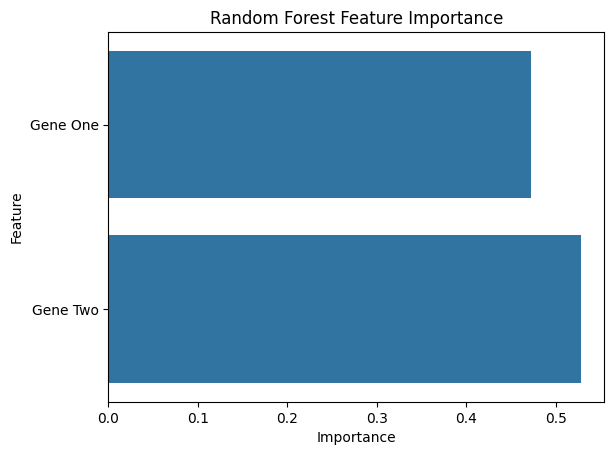

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature names and importance
feature_names = ['Gene One', 'Gene Two']
importances = rf.feature_importances_

# Plotting
sns.barplot(x=importances, y=feature_names)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Plot reveals the relative contribution of each gene to the classification decision, offering early biological insight. Gene One has more influence on the model’s decision than Gene Two.

---

Now that baseline models have been built and evaluated, the next phase includes:

- Building SOTA models using deep learning and ensemble techniques.

- Applying Explainable AI (XAI) SHAP to visualize gene impact.

- Investigating semantic relationships between genes and cancer pathways.

- Integrating medical literature and biological annotations for enhanced interpretability.

- Beginning causal inference analysis to understand associations and directional biological mechanisms.



## Deep Learning for Genomic Prediction
Deep learning models, are best for capturing complex non-linear patterns, improving predictive power.




In [ ]:
# Model architecture
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score

# Set random seed for reproducibility
tf.random.set_seed(42)

# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Training the Model with Early Stopping

In [ ]:
# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4775 - loss: 0.7449 - val_accuracy: 0.4778 - val_loss: 0.6202
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5662 - loss: 0.6126 - val_accuracy: 0.6756 - val_loss: 0.5389
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6769 - loss: 0.5573 - val_accuracy: 0.8667 - val_loss: 0.4914
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7943 - loss: 0.5298 - val_accuracy: 0.8644 - val_loss: 0.4393
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8240 - loss: 0.4836 - val_accuracy: 0.8622 - val_loss: 0.3897
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8273 - loss: 0.4397 - val_accuracy: 0.8556 - val_loss: 0.3558
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8343 - loss: 0.4404 - val_accuracy: 0.8600 - val_loss: 0.3363
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8432 - loss: 0.4158 - val_accuracy: 0.8622 - 

## Model Evaluation

In [ ]:
# Predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32").flatten()
y_prob_nn = model.predict(X_test).flatten()

# Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_nn))


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
 [[348  27]
 [ 15 360]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       375
           1       0.93      0.96      0.94       375

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750


ROC AUC Score: 0.980992


## Visualize Performance

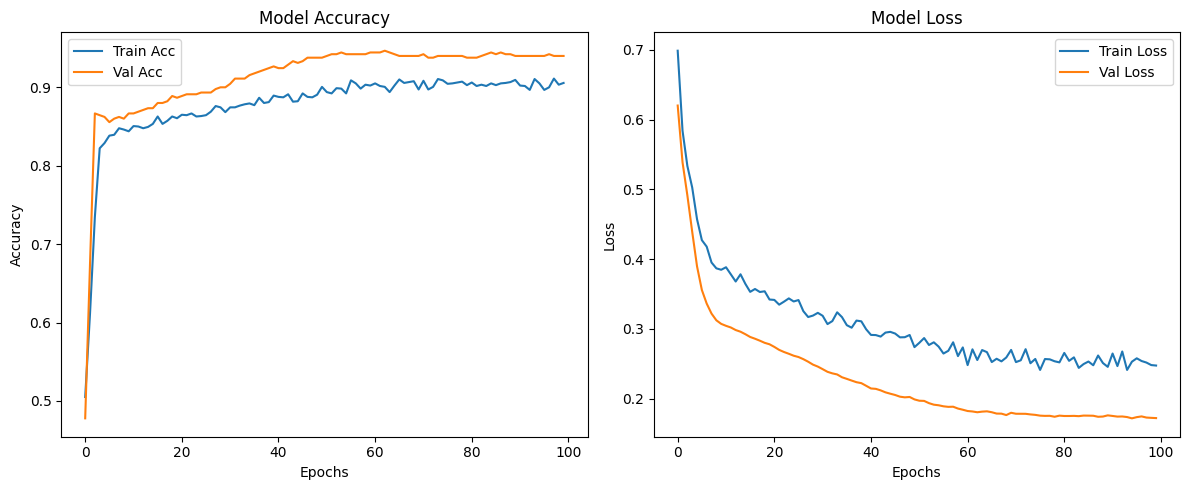

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


No signs of overfitting as accuracy increases while loss is decreasing, which is what we want.

## Explainable AI (XAI) for Medical Interpretability
Interpretability in medical AI systems, is critical in providing confidence in the model's ability to generalize the dataset. This in a sense, provides explainations of why a model reached a particular decision.

Next, the model will be interpreted using SHAP (SHapley Additive exPlanations) to reveal how gene expression levels contributed to predictions.

The upcoming steps will include:

SHAP summary plots for global model understanding.

SHAP force plots for individual-level interpretation.

Comparison of explanations across traditional and deep models.

This bridges the gap between statistical learning and clinical insight, guiding the path toward transparent and trustworthy personalized diagnostics.

Ready to begin SHAP-based model interpretation.

<Figure size 640x480 with 0 Axes>

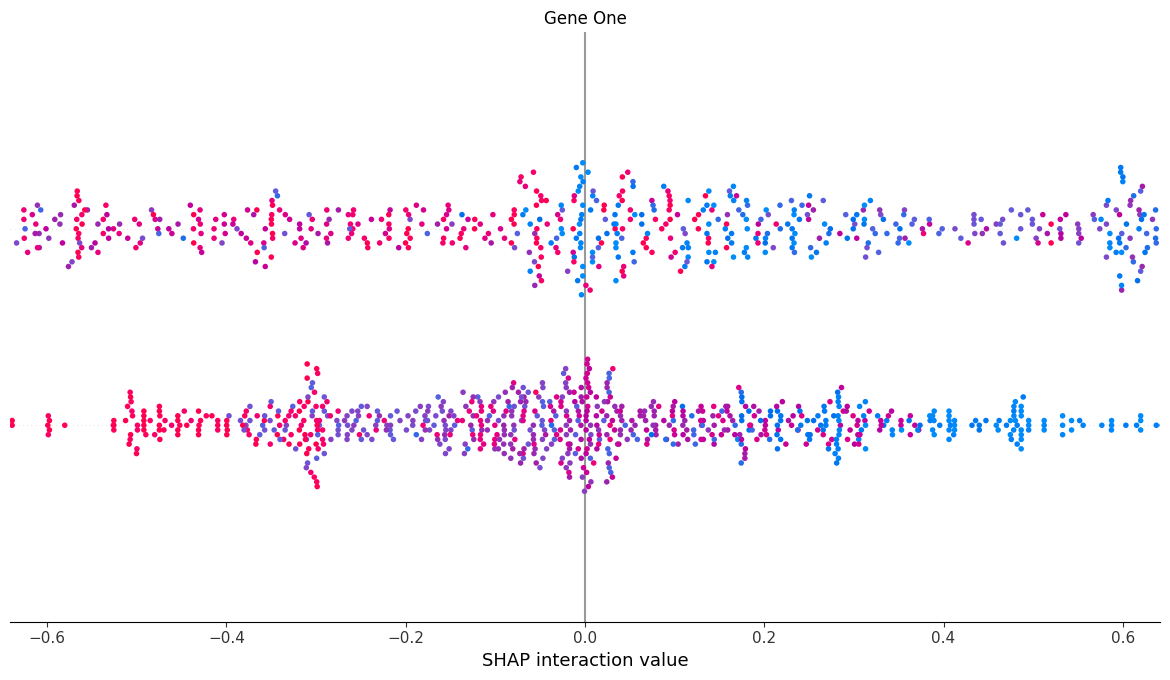

In [ ]:
# TreeExplainer
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)


shap.summary_plot(shap_values_rf, features=X_test, feature_names=['Gene One', 'Gene Two'])


This summary plot shows the magnitude and direction of each gene's contribution. Red points indicate higher values of gene expression; blue points indicate lower values. If Gene One shows strong positive SHAP values, it contributes significantly to predicting cancer presence.

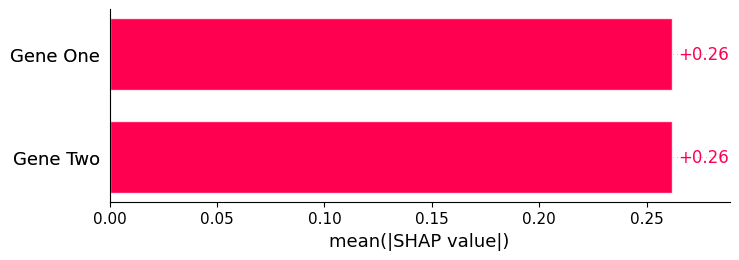

In [ ]:
# Wrap into Explanation object
explanation = shap.Explanation(
    values=shap_values_rf[1],
    base_values=explainer_rf.expected_value[1],
    data=X_test,
    feature_names=['Gene One', 'Gene Two']
)

# Display the chart
shap.plots.bar(explanation)


This bar chart ranks features by their average absolute SHAP value, offering a clear view of global importance across all predictions.

## Interpretation with KernelExplainer
Neural networks are model-agnostic and require KernelExplainer, which uses a perturbation-based approach.

In [ ]:
import numpy as np

# Subset for KernelExplainer
X_sample = X_test[:100]

# Background dataset for SHAP
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# Create KernelExplainer
explainer_nn = shap.KernelExplainer(model.predict, background)
shap_values_nn = explainer_nn.shap_values(X_sample, nsamples=100)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━

 **SHAP** Summary Plot – Neural Network

<Figure size 640x480 with 0 Axes>

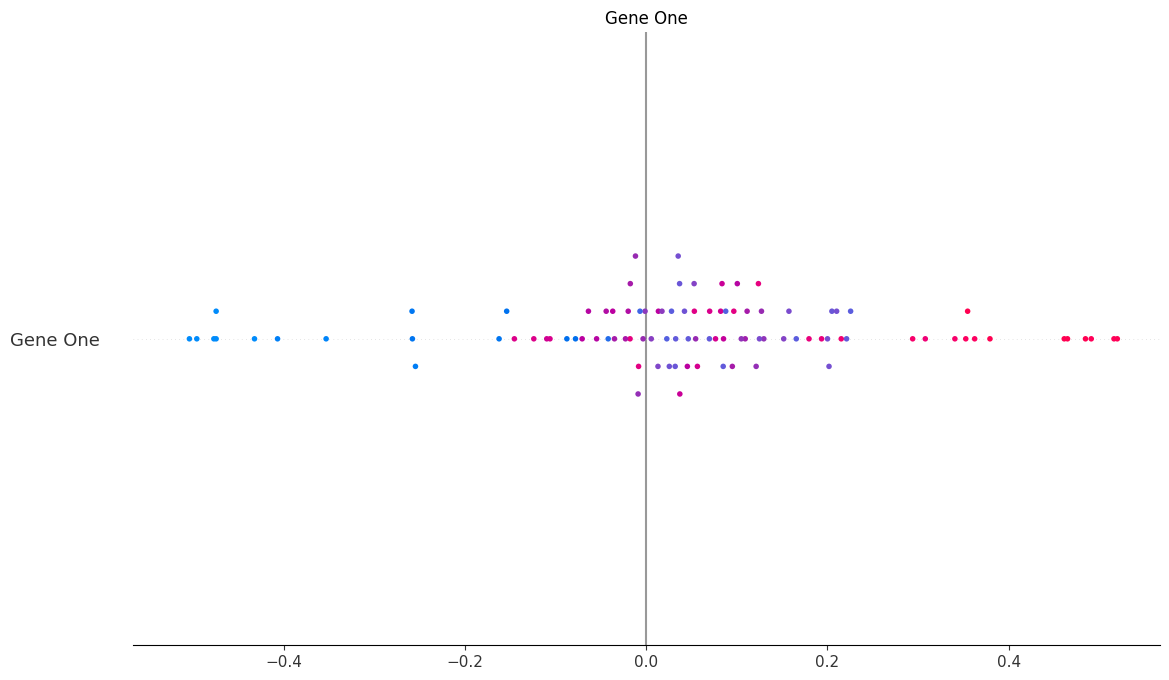

In [ ]:
shap.summary_plot(shap_values_nn, features=X_sample, feature_names=['Gene One', 'Gene Two']);


This shows how the neural network's internal reasoning aligns with or differs from tree-based models. It reveals nonlinear interactions and subtle patterns invisible to linear models.


## Model Comparison and Integrated Interpretation
With predictive models and SHAP-based explainability complete, the focus shifts to comparing model behaviors, in which we may ask the following questions:

- Are both models using the same features?

- Is there consistency in feature importance?

- Do certain genes only matter for specific subsets of patients?


---



Having completed prediction and interpretability, the project will now transition into:

- Semantic analysis of gene relationships using graph-based techniques.

- **Causal inference:** disentangling correlations from actual mechanisms.

- **Multi-gene or multi-omics expansion:** modeling biological complexity.

- **Clinical integration:** how this model could assist diagnostic or therapeutic decisions.


The next section will begin building semantic and causal frameworks to deepen understanding of the gene-disease landscape.

## Semantic Analysis of Gene Interactions Using Graph-Based Modeling
As the goal shifts from simple prediction toward understanding the underlying biological mechanisms, graph-based approaches become essential. Genomic data often reflects complex relationships — genes interact in regulatory networks, signaling pathways, or co-expression clusters that cannot be captured through simple tabular modeling.

To uncover these relationships, the dataset is represented as a semantic graph where:

- Nodes represent genes or patient states.

- Edges encode statistical or functional associations.



This lays the foundation for **biological pathway analysis, semantic similarity,** and **causal inference**.



## Graph Based on Correlation

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix (excluding target)
gene_corr = df[['Gene One', 'Gene Two']].corr()

# Create graph from correlation matrix
G = nx.Graph()

# Add nodes
for gene in gene_corr.columns:
    G.add_node(gene)

# Add edges for correlations above a threshold
threshold = 0.2
for i in gene_corr.columns:
    for j in gene_corr.columns:
        if i != j and abs(gene_corr.loc[i, j]) > threshold:
            G.add_edge(i, j, weight=gene_corr.loc[i, j])


Visualizing the Graph with Edge Weights

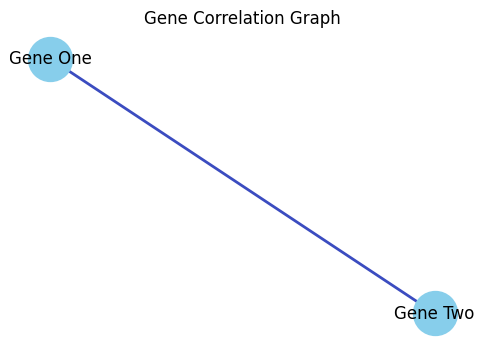

In [ ]:
# Position layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes and edges with correlation weights
plt.figure(figsize=(6, 4))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=12)
edges = nx.draw_networkx_edges(
    G, pos, width=2,
    edge_color=[G[u][v]['weight'] for u, v in G.edges()],
    edge_cmap=plt.cm.coolwarm
)

plt.title("Gene Correlation Graph")
plt.axis('off')
plt.show()


This graph shows the degree of co-expression or statistical association between genes. With more features (e.g., SNPs, methylation sites, transcriptomic layers), the network could be expanded into a multi-layer biological graph.

## Causal Inference — Moving Beyond Correlation
While correlation identifies association, causality aims to answer "what if" questions:

- What happens to cancer risk if Gene One is inhibited?

- Is Gene Two expression a driver or a consequence of cancer?

- Can we simulate patient-specific treatment effects?

To answer these questions, we will apply causal modeling frameworks.

---

## Causal Graph Construction



In [ ]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz

# Apply PC algorithm on your data (X_causal)
pc_result = pc(X_causal, alpha=.10, indep_test_func=fisherz)

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
from causallearn.graph.Edge import Endpoint
import networkx as nx
import matplotlib.pyplot as plt

# Extract causal graph and create a new directed graph
causal_graph = pc_result.G
G_nx = nx.DiGraph()

# Add nodes with string names
for node in causal_graph.get_nodes():
    name = str(node.get_name())
    G_nx.add_node(name)

# Add directed edges based on endpoints
for edge in causal_graph.get_graph_edges():
    src = str(edge.get_node1().get_name())
    tgt = str(edge.get_node2().get_name())
    ep1 = edge.get_endpoint1()
    ep2 = edge.get_endpoint2()

    if ep1 == Endpoint.TAIL and ep2 == Endpoint.ARROW:
        G_nx.add_edge(src, tgt)
    elif ep1 == Endpoint.ARROW and ep2 == Endpoint.TAIL:
        G_nx.add_edge(tgt, src)


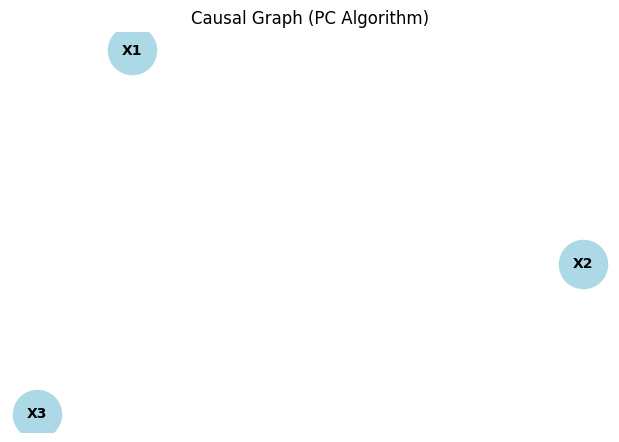

In [ ]:
actual_nodes = list(G_nx.nodes())

# Build mapping dynamically
label_map = {node: f'Gene One' if node == '0' else
                    f'Gene Two' if node == '1' else
                    f'Cancer Present' if node == '2' else node
             for node in actual_nodes}

# Draw graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G_nx, seed=42)
nx.draw(G_nx, pos, with_labels=True, labels=label_map,
        node_size=1200, node_color="lightblue",
        font_size=10, font_weight='bold', arrows=True)
plt.title("Causal Graph (PC Algorithm)")
plt.axis('off')
plt.show()


This result demonstrates that the algorithm did not find any statistically significant conditional dependencies among the variables in our dataset, under the threshold (alpha) and assumptions provided.

That does not mean there's no real biological relationship, just that with this method, we couldn't find statistically valid directed dependencies.

## Future Work
To expand causal modeling:

- Use Bayesian Networks for probabilistic causal inference.

- Introduce counterfactual analysis (e.g., “What if Gene One had lower expression?”).

- Integrate do-calculus for intervention simulation.

- Combine causal graphs with SHAP to build counterfactual explanations for model predictions.

---
